<a href="https://colab.research.google.com/github/wmchen312/TibameDL/blob/main/DL1014MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#tensorflow 2
#import keras(1) -> import tensorflow.keras(2)
from tensorflow.keras.datasets.mnist import load_data
#((訓練圖片,訓練答案),(測試圖片,測試答案))
(x_train,y_train),(x_test,y_test)=load_data()

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
import pandas as pd
#x_train[0] 資料第一筆列出
pd.DataFrame(x_train[0]) #用pandas表格化

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


5


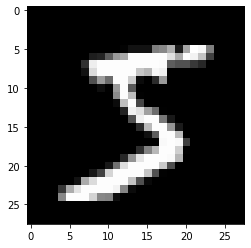

In [ ]:
import matplotlib.pyplot as plt #畫圖
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
#_r 反過來
#camp=顏色
print(y_train[0])
plt.imshow(x_train[0],cmap="gray")

In [ ]:
#1.模型(model,Sequential) 2.層
import os
from tensorflow.keras.models import Sequential
# Dense: 稠密層,全連接層Fully-connected
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

if not os.path.exists("mnist.h5"):
    print("模型不存在,新建:")
    layers=[
        #784*256(bias)=200960
        Dense(256,activation='relu',input_dim=784),
        #128*10(全連接)+10(bias)=1290
        Dense(10,activation='softmax')
        ]
    model = Sequential(layers)
    model.compile(loss=CategoricalCrossentropy(),
           optimizer=Adam(),
           metrics=["accuracy"])
else:
    print("模型已經存在,讀取:") 
    model = load_model("mnist.h5")

model.summary()

模型不存在,新建:
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [ ]:
'''
合併至上一格
#當建立模型結束後須確認細節compile
# loss: 分類=cross entropy
# 二元分類(一個) p(ans) q(pre) plog(1/q) + (1-p)log1/(1-q)
# binary cross entropy
# 多元分類(多個) p1 p2... q1 q2... plog(1/q)
# catergorical cross entropy

from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

model.compile(loss=CategoricalCrossentropy(),
              optimizer=Adam(),
              metrics=["accuracy"])
'''

'\n合併至上一格\n#當建立模型結束後須確認細節compile\n# loss: 分類=cross entropy\n# 二元分類(一個) p(ans) q(pre) plog(1/q) + (1-p)log1/(1-q)\n# binary cross entropy\n# 多元分類(多個) p1 p2... q1 q2... plog(1/q)\n# catergorical cross entropy\n\nfrom tensorflow.keras.losses import CategoricalCrossentropy\nfrom tensorflow.keras.optimizers import Adam\n\nmodel.compile(loss=CategoricalCrossentropy(),\n              optimizer=Adam(),\n              metrics=["accuracy"])\n'

In [ ]:
#y:One-Hot Encoding
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print(y_train[0])
print(y_train_cat[0])
#print(y_test[0])
#print(y_test_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# x:28*28 -> 784
# reshape: 留一個位置填-1,叫numpy幫你算
x_train_norm = x_train.reshape(60000,-1) / 255.0
x_test_norm = x_test.reshape(10000,-1) / 255.0
print(x_train_norm.shape)
print(x_test_norm.shape)
# print(x_train_norm[0])

(60000, 784)
(10000, 784)


In [ ]:
# batch_size: 看多少筆資料調整一次梯度(10-200)
# = 200: 54000(訓練資料) / 200 -> 270(次)梯度調整
# epochs: 54000筆看幾次
# = 10: 270 * 10 (次) 梯度調整
# validation_split: 0.1
# verbose: 1(進度條) 0(啥都沒) 2(不會有進度條)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("mnist.h5", save_best_only=True)
]
model.fit(x_train_norm,
          y_train_cat,
          batch_size=200,
          epochs=100,
          validation_split=0.1,
          verbose=2,
          callbacks=callbacks)

Epoch 1/100
270/270 - 2s - loss: 0.3764 - accuracy: 0.8959 - val_loss: 0.1631 - val_accuracy: 0.9553
Epoch 2/100
270/270 - 1s - loss: 0.1652 - accuracy: 0.9529 - val_loss: 0.1152 - val_accuracy: 0.9678
Epoch 3/100
270/270 - 1s - loss: 0.1160 - accuracy: 0.9664 - val_loss: 0.0935 - val_accuracy: 0.9725
Epoch 4/100
270/270 - 1s - loss: 0.0872 - accuracy: 0.9745 - val_loss: 0.0829 - val_accuracy: 0.9760
Epoch 5/100
270/270 - 1s - loss: 0.0693 - accuracy: 0.9808 - val_loss: 0.0786 - val_accuracy: 0.9757
Epoch 6/100
270/270 - 1s - loss: 0.0552 - accuracy: 0.9846 - val_loss: 0.0754 - val_accuracy: 0.9777
Epoch 7/100
270/270 - 1s - loss: 0.0452 - accuracy: 0.9875 - val_loss: 0.0688 - val_accuracy: 0.9798
Epoch 8/100
270/270 - 1s - loss: 0.0376 - accuracy: 0.9897 - val_loss: 0.0706 - val_accuracy: 0.9780
Epoch 9/100
270/270 - 1s - loss: 0.0301 - accuracy: 0.9924 - val_loss: 0.0649 - val_accuracy: 0.9812
Epoch 10/100
270/270 - 1s - loss: 0.0248 - accuracy: 0.9943 - val_loss: 0.0639 - val_accura

In [ ]:
model.evaluate(x_test_norm,y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0660 - accuracy: 0.9797


[0.06597314774990082, 0.9797000288963318]

In [ ]:
from sklearn.metrics import confusion_matrix
#tf:predict -> sklearn:predict_proba
#tf:predict_classes -> sklearn:predict 版本不能用了
proba = model.predict(x_test_norm)
#axis:0(縱) 1(橫)
pre=proba.argmax(axis=1)
mat = confusion_matrix(y_test,pre)
pd.DataFrame(mat,
    index=["{}(正確)".format(i) for i in range(10)],
    columns=["{}(預測)".format(i) for i in range(10)]    
    )

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(正確),965,1,0,1,1,2,4,2,2,2
1(正確),0,1125,4,0,0,1,2,1,2,0
2(正確),3,1,1010,2,1,0,2,10,2,1
3(正確),0,0,2,987,0,4,1,7,4,5
4(正確),0,0,3,1,963,0,2,3,1,9
5(正確),2,0,0,7,0,872,4,1,3,3
6(正確),4,2,2,1,4,3,938,1,3,0
7(正確),1,3,8,1,0,0,0,1012,1,2
8(正確),4,0,2,4,3,4,2,6,946,3
9(正確),2,2,0,5,7,2,0,11,1,979


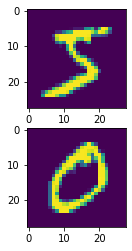

In [ ]:
plt.subplot(2,1,1)
plt.imshow(x_train[0])
plt.subplot(2,1,2)
plt.imshow(x_train[1])

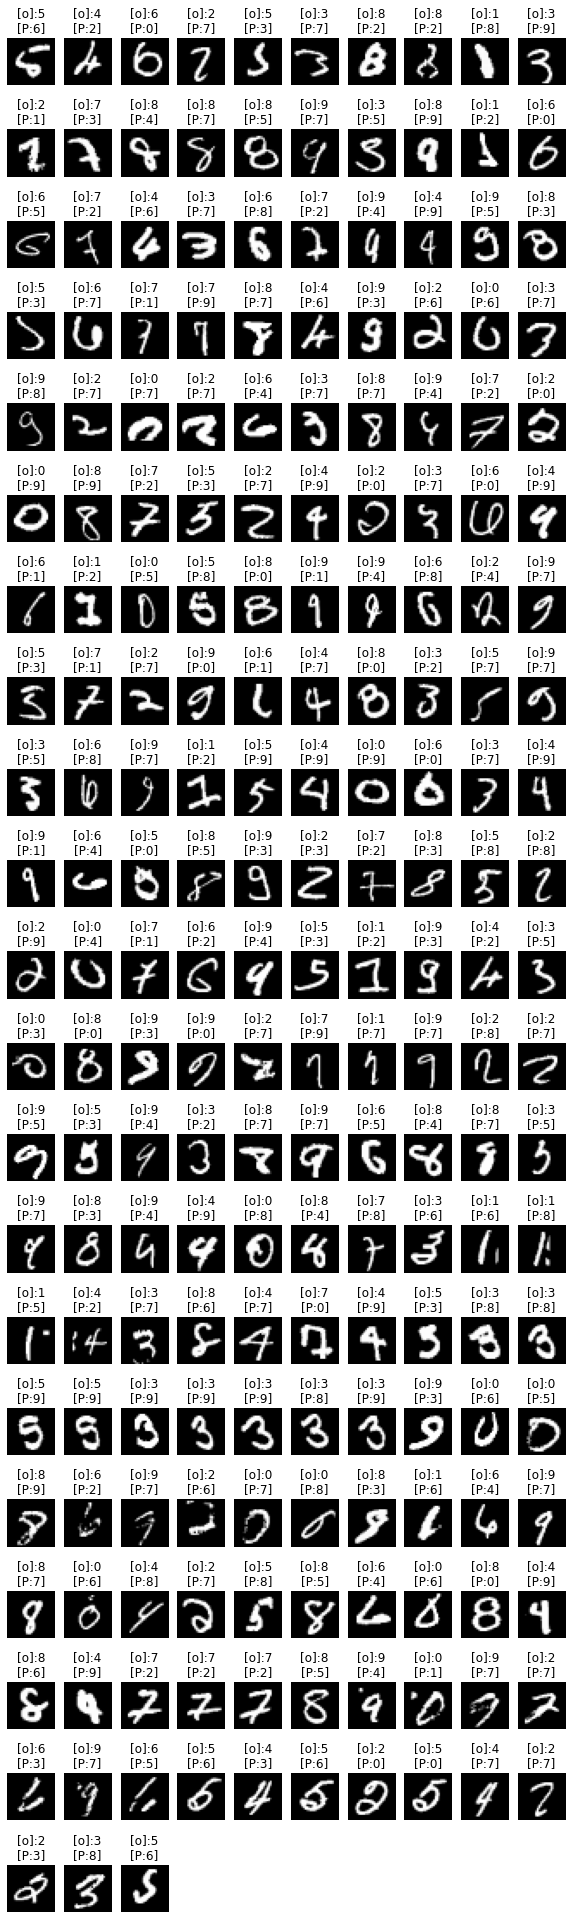

In [ ]:
import numpy as np
idx = np.nonzero(pre != y_test)[0]
pre_false_img = x_test[idx]
pre_false_val = pre[idx]
pre_false_ori = y_test[idx]

plt.figure(figsize=(10,35))
width=10
height=len(idx)//width+1
for i in range(len(idx)):
    plt.subplot(height,width,i+1)
    t="[o]:{}\n[P:{}]".format(pre_false_ori[i],
                 pre_false_val[i])
    plt.title(t)
    plt.axis("off")
    plt.imshow(pre_false_img[i],cmap="gray")


預測: 2


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


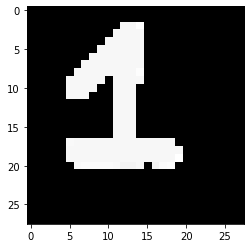

In [ ]:
import requests
from PIL import Image
url = "https://stickershop.line-scdn.net/stickershop/v1/product/6002912/LINEStorePC/main.png;compress=true"
response = requests.get(url, stream=True, verify=False)
img = Image.open(response.raw).resize((28, 28)).convert("L")
img_np = np.array(img).reshape(1,784)/255.0 #整批資料中的一筆
ans=model.predict(img_np).argmax(axis=1)
print("預測:",ans[0])
plt.imshow(img,cmap="gray")

In [ ]:
#使用hdf view 下載最新版本
#手動儲存: model.save("mlp.h5")
#from tensorflow.keras.models import load_model
#load_model("mlp.h5")
#compile不用做
#繼續fit/pre